# Sentiment Analysis of customer reviews in Amazon

Abstract: An analysis of the Amazon customer review dataset was conducted to understand customer sentiment. Overall, customers exhibit a positive sentiment, frequently using terms such as "good product," "best," "work," "nice," "great," "better," "quality," and "value for money."

Sentiment was also analyzed across different product categories. Categories such as Toys and Games, Craft Materials, and Office Electronics received the highest positive sentiment. In contrast, the Health & Personal Care category, particularly the subcategory Home Medical Supplies & Equipment, garnered the least positive reviews.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import re

In [84]:
#loading dataset
df = pd.read_csv('amazon.csv')
df_original = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [83]:
df['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [86]:
df['category_list'] = df['category'].str.split('|')

max_categories = df['category_list'].apply(len).max()
for i in range(max_categories):
  df[f'category{i+1}'] = df['category_list'].apply(lambda x:x[i] if i < len(x) else None)

In [87]:
df = df.drop(columns=['category_list'])
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_content,img_link,product_link,category1,category2,category3,category4,category5,category6,category7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None


No missing values

In [88]:
df['product_id'].nunique()

1351

In [90]:
df = df[['product_id', 'category1', 'category2', 'category3', 'review_content']]

In [91]:
df.head()

,product_id,category1,category2,category3,review_content
0,B07JW9H4J1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,I ordered this cable to connect my phone to An...
2,B096MSW6CT,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,"Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,"Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,"Bought this instead of original apple, does th..."


In [92]:
df['review_content'] = df['review_content'].str.lower()
df.head()

<ipython-input-92-f44ef8fb5052>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_content'] = df['review_content'].str.lower()


,product_id,category1,category2,category3,review_content
0,B07JW9H4J1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,looks durable charging is fine toono complains...
1,B098NS6PVG,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,i ordered this cable to connect my phone to an...
2,B096MSW6CT,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,"not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,"good product,long wire,charges good,nice,i bou..."
4,B08CF3B7N1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,"bought this instead of original apple, does th..."


In [93]:
#remove ids and websites from content
def remove_ids(review_content):
  menton_ids = re.sub(r"(@[A-Za-z0-9]+)|(\w+:\/\/\S+)", "", str(review_content))
  spaces_removed = re.sub(r"\s\s+", " ", str(menton_ids))
  return spaces_removed

df['review_content'] = df['review_content'].apply(remove_ids)
df.head()

<ipython-input-93-fcacd7114482>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_content'] = df['review_content'].apply(remove_ids)


,product_id,category1,category2,category3,review_content
0,B07JW9H4J1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,looks durable charging is fine toono complains...
1,B098NS6PVG,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,i ordered this cable to connect my phone to an...
2,B096MSW6CT,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,"not quite durable and sturdy, good, nice produ..."
3,B08HDJ86NZ,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,"good product,long wire,charges good,nice,i bou..."
4,B08CF3B7N1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,"bought this instead of original apple, does th..."


In [94]:
def remove_commas(review_content):
    review_content = re.sub(r'\,', ' ', review_content)
    return review_content

df['review_content'] = df['review_content'].apply(remove_commas)
df.head()

<ipython-input-94-f45be96b050a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_content'] = df['review_content'].apply(remove_commas)


,product_id,category1,category2,category3,review_content
0,B07JW9H4J1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,looks durable charging is fine toono complains...
1,B098NS6PVG,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,i ordered this cable to connect my phone to an...
2,B096MSW6CT,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,not quite durable and sturdy good nice produ...
3,B08HDJ86NZ,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,good product long wire charges good nice i bou...
4,B08CF3B7N1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,bought this instead of original apple does th...


In [95]:
# Remove punctuations
df['review_content'] = df['review_content'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.
df.tail()

<ipython-input-95-c63a038cb66e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_content'] = df['review_content'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.


,product_id,category1,category2,category3,review_content
1460,B08L7J3T31,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,i received product without spanner excellent p...
1461,B01M6453MB,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,ok got everything as mentioned but the measuri...
1462,B009P2LIL4,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,plastic but cool body u have to find sturdy s...
1463,B00J5DYCCA,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,i have installed this in my kitchen working fi...
1464,B01486F4G6,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,it does it job perfectly..only issue is temp c...


In [96]:
#Remove stop words
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
# get the list of all stopwords from the library
stop = stopwords.words('english')

In [42]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [98]:
stop.remove('not')

In [99]:
def remove_stop_words(review_content):
  tokens = review_content.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = ' '.join(stop_removed_tokens)
  return convert_to_string

df['review_content'] = df['review_content'].apply(remove_stop_words)

<ipython-input-99-314f922d029e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_content'] = df['review_content'].apply(remove_stop_words)


In [100]:
df.head()

,product_id,category1,category2,category3,review_content
0,B07JW9H4J1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,looks durable charging fine toono complains ch...
1,B098NS6PVG,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,ordered cable connect phone android auto car. ...
2,B096MSW6CT,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,not quite durable sturdy good nice product wor...
3,B08HDJ86NZ,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,good product long wire charges good nice bough...
4,B08CF3B7N1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,bought instead original apple work 150rs not f...


Stemming

In [101]:
from nltk.stem import PorterStemmer

In [102]:
stemmer = PorterStemmer()

def stem_words(review_content):
  tokens = review_content.split()
  stemmed_tokens = [stemmer.stem(t) for t in tokens]
  convert_to_string = ' '.join(stemmed_tokens)
  return convert_to_string

df['stemmed_content'] = df['review_content'].apply(stem_words)
df[['stemmed_content', 'review_content']].head(10)

<ipython-input-102-941b5fbf9aa0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_content'] = df['review_content'].apply(stem_words)


,stemmed_content,review_content
0,look durabl charg fine toono complain charg re...,looks durable charging fine toono complains ch...
1,order cabl connect phone android auto car. cab...,ordered cable connect phone android auto car. ...
2,not quit durabl sturdi good nice product work ...,not quite durable sturdy good nice product wor...
3,good product long wire charg good nice bought ...,good product long wire charges good nice bough...
4,bought instead origin appl work 150r not fast ...,bought instead original apple work 150rs not f...
5,good product. like good item strong use usb ca...,good product. like good item strong useful usb...
6,build qualiti good come 2 year warranty. good ...,build quality good comes 2 year warranty. good...
7,worth money - suitabl android auto... purpos s...,worth money - suitable android auto... purpose...
8,use connect old pc internet. tri lubuntu 20 ub...,use connect old pc internet. tried lubuntu 20 ...
9,order cabl connect phone android auto car. cab...,ordered cable connect phone android auto car. ...


Lemmatization

In [103]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [104]:
def lemmatize_words(review_content):
  tokens = review_content.split()
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in tokens]
  lemma_sentence = ' '.join(lemmatized_tokens)
  return lemma_sentence

df['lemmatized_content'] = df['review_content'].apply(lemmatize_words)
df[['lemmatized_content', 'review_content']].head(10)

<ipython-input-104-7766abd7806d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_content'] = df['review_content'].apply(lemmatize_words)


,lemmatized_content,review_content
0,look durable charging fine toono complains cha...,looks durable charging fine toono complains ch...
1,ordered cable connect phone android auto car. ...,ordered cable connect phone android auto car. ...
2,not quite durable sturdy good nice product wor...,not quite durable sturdy good nice product wor...
3,good product long wire charge good nice bought...,good product long wire charges good nice bough...
4,bought instead original apple work 150rs not f...,bought instead original apple work 150rs not f...
5,good product. like good item strong useful usb...,good product. like good item strong useful usb...
6,build quality good come 2 year warranty. good ...,build quality good comes 2 year warranty. good...
7,worth money - suitable android auto... purpose...,worth money - suitable android auto... purpose...
8,use connect old pc internet. tried lubuntu 20 ...,use connect old pc internet. tried lubuntu 20 ...
9,ordered cable connect phone android auto car. ...,ordered cable connect phone android auto car. ...


lemmatized version is more understandable than stemmed version

In [105]:
# word frequency
word_freq = pd.Series(' '.join(df['lemmatized_content']).split()).value_counts()
word_freq[:10]

,count
good,5488
not,3310
product,3302
quality,2082
use,1363
cable,1348
one,1257
like,1212
also,1115
price,1104


Text Corpus

In [52]:
from PIL import Image
from wordcloud import WordCloud

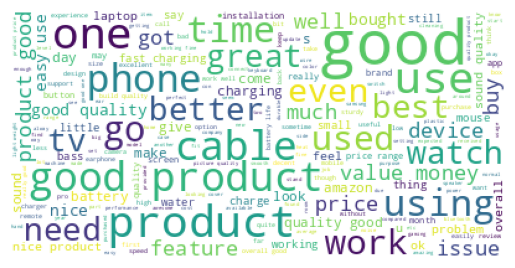

In [106]:
corpus = list(df['lemmatized_content'])

wordcloud = WordCloud(background_color = 'white', max_words = 200, max_font_size = 50, random_state = 42)
wordcloud.generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

common words: good product, good, best, work, need, nice, great, better, quality, value money, easy use, good quality, nice product, well.

In [107]:
# removing common words
new_words_to_remove = ["one", "cable", "phone", "tv"]

In [108]:
df['lemmatized_content'] = df['lemmatized_content'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))
df.head(5)

<ipython-input-108-faf327f205ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_content'] = df['lemmatized_content'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))


,product_id,category1,category2,category3,review_content,stemmed_content,lemmatized_content
0,B07JW9H4J1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,looks durable charging fine toono complains ch...,look durabl charg fine toono complain charg re...,look durable charging fine toono complains cha...
1,B098NS6PVG,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,ordered cable connect phone android auto car. ...,order cabl connect phone android auto car. cab...,ordered connect android auto car. really stron...
2,B096MSW6CT,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,not quite durable sturdy good nice product wor...,not quit durabl sturdi good nice product work ...,not quite durable sturdy good nice product wor...
3,B08HDJ86NZ,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,good product long wire charges good nice bough...,good product long wire charg good nice bought ...,good product long wire charge good nice bought...
4,B08CF3B7N1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,bought instead original apple work 150rs not f...,bought instead origin appl work 150r not fast ...,bought instead original apple work 150rs not f...


In [109]:
word_frequency = pd.Series(' '.join(df['lemmatized_content']).split()).value_counts()
word_frequency[:10]

,count
good,5488
not,3310
product,3302
quality,2082
use,1363
like,1212
also,1115
price,1104
work,1023
using,990


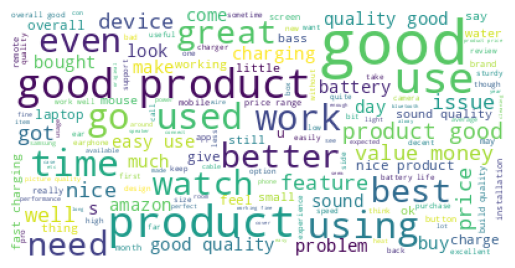

In [110]:
corpus = list(df['lemmatized_content'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

identical. positive review

Bigrams

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [111]:
def get_ngrams(corpus, ngram_range=(2,2)):
  vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)
  bag_of_words = vec1.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq

In [112]:
bigrams = get_ngrams(df['lemmatized_content'].tolist(), ngram_range=(2,2))

In [113]:
bigrams

[('good product', 857),
 ('value money', 465),
 ('product good', 442),
 ('good quality', 389),
 ('quality good', 388),
 ('easy use', 369),
 ('nice product', 310),
 ('sound quality', 271),
 ('fast charging', 265),
 ('not good', 263),
 ('price range', 238),
 ('build quality', 218),
 ('battery life', 216),
 ('overall good', 196),
 ('good good', 188),
 ('also good', 185),
 ('work well', 183),
 ('picture quality', 171),
 ('working fine', 158),
 ('not working', 148),
 ('go it', 147),
 ('product price', 143),
 ('really good', 138),
 ('quality product', 136),
 ('light weight', 136),
 ('good price', 129),
 ('work fine', 114),
 ('look good', 114),
 ('battery backup', 112),
 ('quality not', 110),
 ('worth money', 104),
 ('power bank', 99),
 ('great product', 94),
 ('charging speed', 92),
 ('product not', 92),
 ('product nice', 92),
 ('easy install', 88),
 ('like product', 86),
 ('good not', 86),
 ('little bit', 83),
 ('good enough', 82),
 ('good battery', 81),
 ('stopped working', 80),
 ('good ni

can't understand ath from bigram.

Trigram

In [114]:
trigrams = get_ngrams(df['lemmatized_content'].tolist(), ngram_range=(3,3))
trigrams

[('good product good', 73),
 ('good value money', 69),
 ('good quality product', 60),
 ('product value money', 56),
 ('good product price', 55),
 ('product good product', 52),
 ('overall good product', 51),
 ('good quality good', 48),
 ('product easy use', 48),
 ('good good product', 47),
 ('quality also good', 47),
 ('product price range', 45),
 ('sound quality good', 45),
 ('quality not good', 45),
 ('value money good', 44),
 ('good battery life', 42),
 ('support fast charging', 40),
 ('build quality good', 40),
 ('value money product', 39),
 ('nice product good', 38),
 ('good easy use', 37),
 ('not working properly', 34),
 ('product quality good', 32),
 ('good nice product', 32),
 ('battery life good', 32),
 ('good product value', 31),
 ('picture quality good', 31),
 ('good product nice', 31),
 ('good sound quality', 31),
 ('quality good product', 28),
 ('easy use good', 28),
 ('battery backup good', 28),
 ('price range good', 26),
 ('money good product', 26),
 ('product good qualit

common phrases: 'good product good',
'good value money',
'good quality product',
'product value money',
'good product price',
'product good product',
'overall good product',
'good quality good',
'product easy use',
'good good product'

Sentiment Analysis

In [61]:
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities

In [115]:
df_content_processed =  df.copy()
df_content_processed.replace('', np.nan, inplace=True)
df_content_processed['lemmatized_content'] = df_content_processed['lemmatized_content'].astype(str)
df_content_processed['sentiment'] = df_content_processed['lemmatized_content'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [116]:
df_content_processed[['lemmatized_content', 'sentiment']].head(50)

,lemmatized_content,sentiment
0,look durable charging fine toono complains cha...,0.448958
1,ordered connect android auto car. really stron...,0.354293
2,not quite durable sturdy good nice product wor...,0.633333
3,good product long wire charge good nice bought...,0.367949
4,bought instead original apple work 150rs not f...,0.328014
5,good product. like good item strong useful usb...,0.486667
6,build quality good come 2 year warranty. good ...,0.676190
7,worth money - suitable android auto... purpose...,0.435256
8,use connect old pc internet. tried lubuntu 20 ...,0.286548
9,ordered connect android auto car. really stron...,0.354293


In [117]:
df_content_processed

,product_id,category1,category2,category3,review_content,stemmed_content,lemmatized_content,sentiment
0,B07JW9H4J1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,looks durable charging fine toono complains ch...,look durabl charg fine toono complain charg re...,look durable charging fine toono complains cha...,0.448958
1,B098NS6PVG,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,ordered cable connect phone android auto car. ...,order cabl connect phone android auto car. cab...,ordered connect android auto car. really stron...,0.354293
2,B096MSW6CT,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,not quite durable sturdy good nice product wor...,not quit durabl sturdi good nice product work ...,not quite durable sturdy good nice product wor...,0.633333
3,B08HDJ86NZ,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,good product long wire charges good nice bough...,good product long wire charg good nice bought ...,good product long wire charge good nice bought...,0.367949
4,B08CF3B7N1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,bought instead original apple work 150rs not f...,bought instead origin appl work 150r not fast ...,bought instead original apple work 150rs not f...,0.328014
...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,received product without spanner excellent pro...,receiv product without spanner excel product l...,received product without spanner excellent pro...,0.359524
1461,B01M6453MB,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,ok got everything mentioned measuring cup brok...,ok got everyth mention measur cup broken expec...,ok got everything mentioned measuring cup brok...,0.192982
1462,B009P2LIL4,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,plastic cool body u find sturdy surface put ve...,plastic cool bodi u find sturdi surfac put ver...,plastic cool body u find sturdy surface put ve...,0.295263
1463,B00J5DYCCA,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,installed kitchen working fine fan speed slow ...,instal kitchen work fine fan speed slow could ...,installed kitchen working fine fan speed slow ...,0.101562


Positive sentiment

In [118]:
df_content_processed.groupby(['category1'])['sentiment'].mean()

,sentiment
category1,
Car&Motorbike,0.244400
Computers&Accessories,0.326949
Electronics,0.294391
Health&PersonalCare,0.145291
Home&Kitchen,0.310421
HomeImprovement,0.234752
MusicalInstruments,0.233691
OfficeProducts,0.391425
Toys&Games,0.402083


In [119]:
df_content_processed.groupby(['category2'])['sentiment'].mean()

,sentiment
category2,
Accessories,0.360640
Accessories&Peripherals,0.334230
Arts&Crafts,0.402083
Cameras&Photography,0.349181
CarAccessories,0.244400
Components,0.255776
CraftMaterials,0.482975
Electrical,0.234752
ExternalDevices&DataStorage,0.286643


In [121]:
category_sentiment = df_content_processed.groupby(['category2'])['sentiment'].mean()

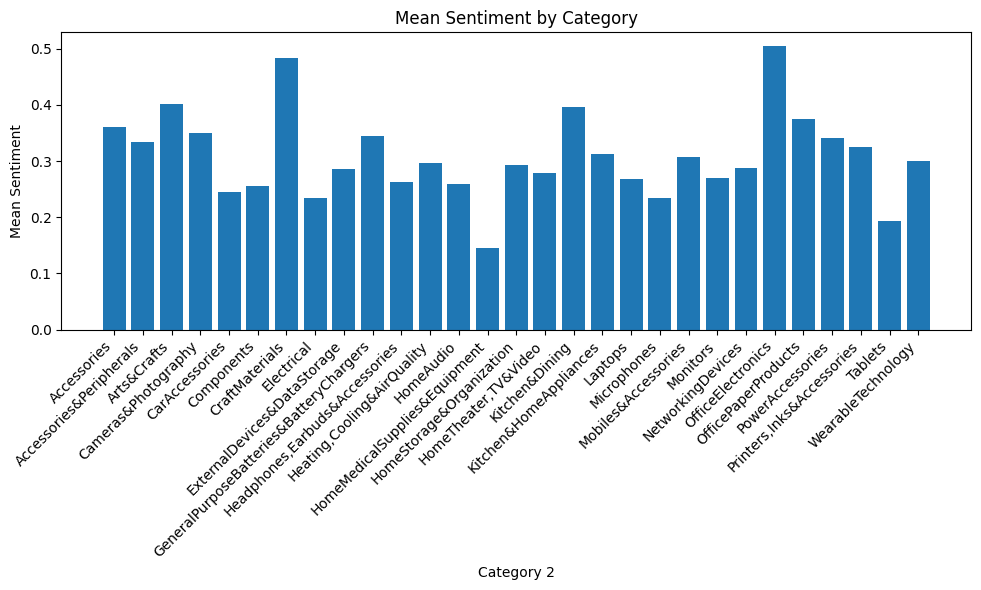

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(category_sentiment.index, category_sentiment.values)
plt.xlabel("Category 2")
plt.ylabel("Mean Sentiment")
plt.title("Mean Sentiment by Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()